In [1]:
class Struggle:
    def __len__(self):
        return 23

In [2]:
from collections import abc

In [4]:
isinstance(Struggle(), abc.Sized)

True

In [8]:
len(dir(abc))

34

In [9]:
dir(abc)

['AsyncGenerator',
 'AsyncIterable',
 'AsyncIterator',
 'Awaitable',
 'ByteString',
 'Callable',
 'Collection',
 'Container',
 'Coroutine',
 'Generator',
 'Hashable',
 'ItemsView',
 'Iterable',
 'Iterator',
 'KeysView',
 'Mapping',
 'MappingView',
 'MutableMapping',
 'MutableSequence',
 'MutableSet',
 'Reversible',
 'Sequence',
 'Set',
 'Sized',
 'ValuesView',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__']

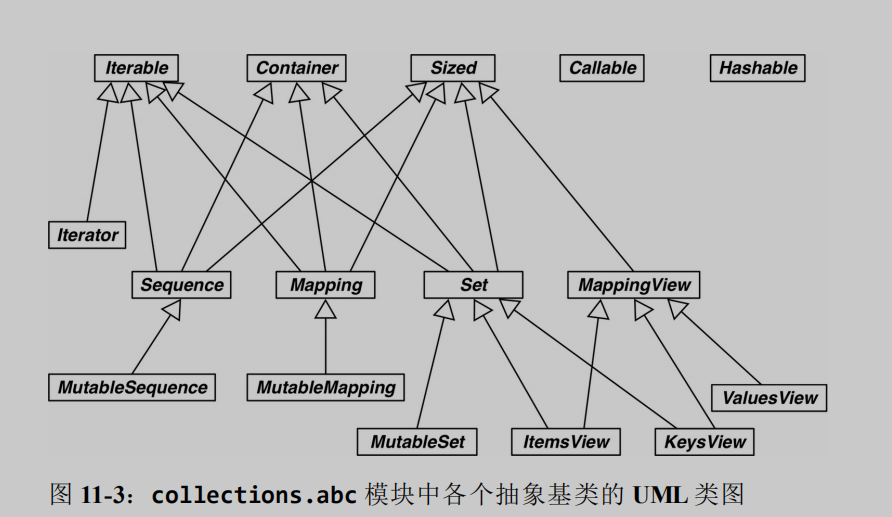

import numbers

In [10]:
import numbers

In [11]:
dir(numbers)

['ABCMeta',
 'Complex',
 'Integral',
 'Number',
 'Rational',
 'Real',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'abstractmethod']

In [12]:
import abc

In [13]:
dir(abc.ABC)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '_abc_impl']

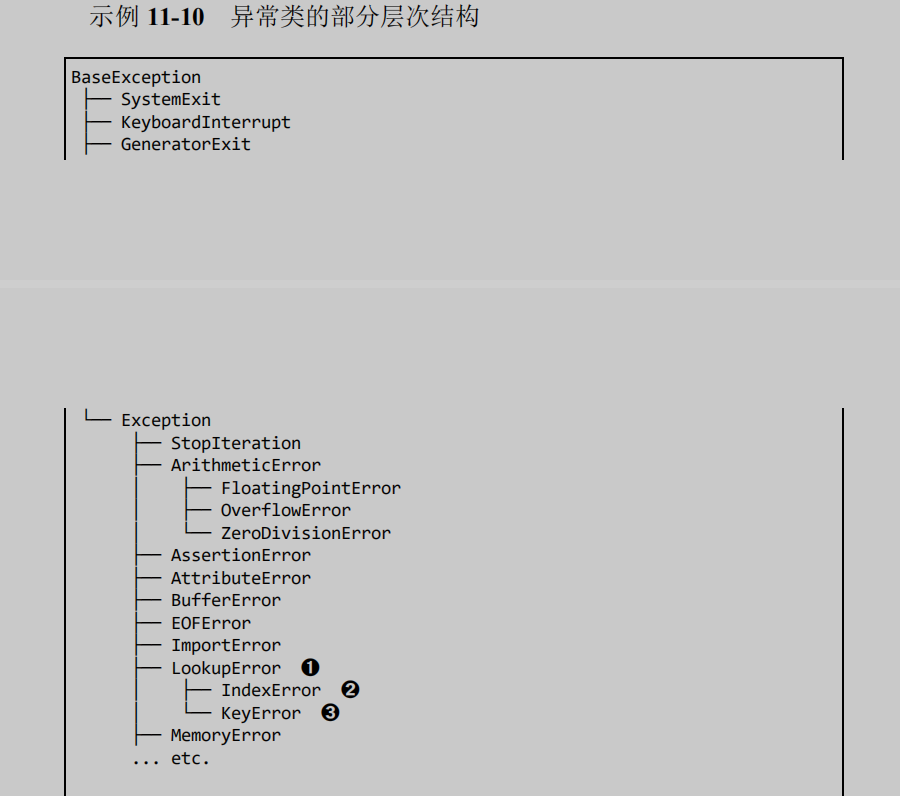

In [18]:
class Tombola(abc.ABC):
    @abc.abstractmethod
    def load(self, iterable):
        """从可迭代对象中添加元素"""
    
    @abc.abstractmethod
    def pick(self):
        """随机删除元素，然后将其返回
        如果实例为空，这个方法应该抛出'lookupError'
        """
    
    def loaded(self):
        return bool(self.inspect())
    
    def inspect(self):
        items - []
        while True:
            try:
                items.append(self.pick())
            except LookupError:
                break
            self.load(items)
            return tuple(sorted(items))

In [19]:
class Fake(Tombola):
    def pick(self):
        return 33

In [20]:
Fake

__main__.Fake

In [21]:
f = Fake()

TypeError: Can't instantiate abstract class Fake with abstract methods load

In [22]:
import random
class BingoCage(Tombola):
    def __init__(self, items):
        self._randomizer = random.SystemRandom()
        self._items = []
        self.load(items)
    
    def load(self, items):
        self._items.extend(items)
        self._randomizer.shuffle(self._items)
    
    def pick(self):
        try:
            return self._items.pop()
        except IndexError:
            raise LookupError('pick from empty BingoCage')
        
    def __call__(self):
        self.pick()

In [23]:
BingoCage.__mro__

(__main__.BingoCage, __main__.Tombola, abc.ABC, object)

In [29]:
Tombola.__subclasses__()

[__main__.Fake, __main__.BingoCage]

In [32]:
Tombola._abc_registry

AttributeError: type object 'Tombola' has no attribute '_abc_registry'

In [35]:
from random import randrange
randrange(20)

1

In [41]:
@Tombola.register
class TomboList(list):
    def pick(self):
        if self:
            position = randrange(len(self))
            return self.pop(position)
        else:
            raise LookupError('pop from empty TomboList')
    
    load = list.extend
    def loaded(self):
        return bool(self)
    
    def inspect(self):
        return tuple(sorted(self))

In [42]:
Tombola._abc_registry

AttributeError: type object 'Tombola' has no attribute '_abc_registry'

In [39]:
Tombola.__subclasses__()

[__main__.Fake, __main__.BingoCage]